# Project_X


# Шаг 1. Подготовка данных к работе
**Первым делом мы читаем наши данные**

In [50]:
import pandas as pd
df=pd.read_csv("Top_Movies.csv")
df.head()

,Movie Name,Rating,Runtime,Genre,Metascore,Plot,Directors,Stars,Votes,Gross,Link
0,The Godfather,9.2,175 min,"Crime, Drama",100.0,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1914405,"134,966,411",https://www.imdb.com/title/tt0068646/
1,The Shawshank Redemption,9.3,142 min,Drama,82.0,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2751997,"28,341,469",https://www.imdb.com/title/tt0111161/
2,Shichinin no samurai,8.6,207 min,"Action, Drama",98.0,Farmers from a village exploited by bandits hi...,Akira Kurosawa,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",353392,"269,061",https://www.imdb.com/title/tt0047478/
3,Cidade de Deus,8.6,130 min,"Crime, Drama",79.0,"In the slums of Rio, two kids' paths diverge a...",Fernando Meirelles,"Kátia Lund, Alexandre Rodrigues, Leandro Firmi...",772169,"7,563,397",https://www.imdb.com/title/tt0317248/
4,The Godfather Part II,9.0,202 min,"Crime, Drama",90.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1303664,"57,300,000",https://www.imdb.com/title/tt0071562/


**Сейчас мы решили посмотреть количество пропусков в нашей таблице и удалить их. Мы не хотим заменять отсутствующие данные на медиану и т.д., потому что это будут не точные данные, которые могут в дальнейшем повлиять на наше исследование.**

In [51]:
df.isnull().sum()

Movie Name     0
Rating         0
Runtime        0
Genre          0
Metascore     22
Plot           0
Directors      0
Stars          0
Votes          0
Gross         44
Link           0
dtype: int64

In [52]:
df=df.dropna()
df.isnull().sum()

Movie Name    0
Rating        0
Runtime       0
Genre         0
Metascore     0
Plot          0
Directors     0
Stars         0
Votes         0
Gross         0
Link          0
dtype: int64

**Мы решили соединить два датасета, чтобы указать год выпуска фильма. Для этого мы читаем вторые данные.**

In [53]:
df2 = pd.read_csv("movies_imdb.csv")
df2.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,1,tt0111161,2019-03-07,2019-03-07,NaN,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,Movie,9.3,142,1994,Drama,2893698,1994-10-14,Frank Darabont
1,2,tt0068646,2019-03-07,2019-03-07,NaN,The Godfather,https://www.imdb.com/title/tt0068646/,Movie,9.2,175,1972,"Crime, Drama",2016240,1972-03-24,Francis Ford Coppola
2,3,tt0468569,2019-03-07,2019-03-07,NaN,The Dark Knight,https://www.imdb.com/title/tt0468569/,Movie,9.0,152,2008,"Action, Crime, Drama, Thriller",2875372,2008-08-14,Christopher Nolan
3,4,tt0071562,2019-03-07,2019-03-07,NaN,The Godfather Part II,https://www.imdb.com/title/tt0071562/,Movie,9.0,202,1974,"Crime, Drama",1366262,1974-12-18,Francis Ford Coppola
4,5,tt0167260,2019-03-07,2019-03-07,NaN,The Lord of the Rings: The Return of the King,https://www.imdb.com/title/tt0167260/,Movie,9.0,201,2004,"Action, Adventure, Drama, Fantasy",1982235,2004-01-22,Peter Jackson


**Здесь мы также решили посмотреть количество пропусков, оказалось, что они присутствуют только в столбике "Description"**

In [54]:
df2.isnull().sum()

Position            0
Const               0
Created             0
Modified            0
Description       487
Title               0
URL                 0
Title Type          0
IMDb Rating         0
Runtime (mins)      0
Year                0
Genres              0
Num Votes           0
Release Date        0
Directors           0
dtype: int64

**Также нам ни к чему некоторые стобцы, мы их удаляем, а также переименуем столбик для удобства.**

In [55]:
df2.rename(columns={'Title': 'Movie Name'}, inplace=True)
df2.drop('Position', axis=1, inplace=True)
df2.drop('Const', axis=1, inplace=True)
df2.drop('Created', axis=1, inplace=True)
df2.drop('Modified', axis=1, inplace=True)
df2.drop('Description', axis=1, inplace=True)
df2

,Movie Name,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,Movie,9.3,142,1994,Drama,2893698,1994-10-14,Frank Darabont
1,The Godfather,https://www.imdb.com/title/tt0068646/,Movie,9.2,175,1972,"Crime, Drama",2016240,1972-03-24,Francis Ford Coppola
2,The Dark Knight,https://www.imdb.com/title/tt0468569/,Movie,9.0,152,2008,"Action, Crime, Drama, Thriller",2875372,2008-08-14,Christopher Nolan
3,The Godfather Part II,https://www.imdb.com/title/tt0071562/,Movie,9.0,202,1974,"Crime, Drama",1366262,1974-12-18,Francis Ford Coppola
4,The Lord of the Rings: The Return of the King,https://www.imdb.com/title/tt0167260/,Movie,9.0,201,2004,"Action, Adventure, Drama, Fantasy",1982235,2004-01-22,Peter Jackson
...,...,...,...,...,...,...,...,...,...,...
482,Freaks,https://www.imdb.com/title/tt0022913/,Movie,7.8,64,1932,"Drama, Horror",50670,1932-02-20,Tod Browning
483,Frankenstein,https://www.imdb.com/title/tt0021884/,Movie,7.8,70,1932,"Drama, Horror, Sci-Fi, Thriller",79836,1932-12-10,James Whale
484,Mou gaan dou,https://www.imdb.com/title/tt0338564/,Movie,8.0,101,2002,"Action, Crime, Drama, Mystery, Thriller",131597,2002-12-12,"Andrew Lau, Alan Mak"
485,The Manchurian Candidate,https://www.imdb.com/title/tt0056218/,Movie,7.9,126,1962,"Drama, Thriller",79921,1962-10-24,John Frankenheimer


**Чтобы получить одну таблицу, мы решили соединить две предыдущие по названиям фильмов. Для этого мы используем метод merge. Также сразу проверяем на наличие пропусков и удаляем их**

In [56]:
df_movies=pd.merge(df,df2,on=['Movie Name'], how='left')
df_movies.isnull().sum()

Movie Name          0
Rating              0
Runtime             0
Genre               0
Metascore           0
Plot                0
Directors_x         0
Stars               0
Votes               0
Gross               0
Link                0
URL               176
Title Type        176
IMDb Rating       176
Runtime (mins)    176
Year              176
Genres            176
Num Votes         176
Release Date      176
Directors_y       176
dtype: int64

In [57]:
df_movies=df_movies.dropna()
df_movies

,Movie Name,Rating,Runtime,Genre,Metascore,Plot,Directors_x,Stars,Votes,Gross,Link,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors_y
0,The Godfather,9.2,175 min,"Crime, Drama",100.0,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1914405,"134,966,411",https://www.imdb.com/title/tt0068646/,https://www.imdb.com/title/tt0068646/,Movie,9.2,175.0,1972.0,"Crime, Drama",2016240.0,1972-03-24,Francis Ford Coppola
1,The Shawshank Redemption,9.3,142 min,Drama,82.0,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2751997,"28,341,469",https://www.imdb.com/title/tt0111161/,https://www.imdb.com/title/tt0111161/,Movie,9.3,142.0,1994.0,Drama,2893698.0,1994-10-14,Frank Darabont
2,Shichinin no samurai,8.6,207 min,"Action, Drama",98.0,Farmers from a village exploited by bandits hi...,Akira Kurosawa,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",353392,"269,061",https://www.imdb.com/title/tt0047478/,https://www.imdb.com/title/tt0047478/,Movie,8.6,207.0,1954.0,"Action, Drama",367272.0,1954-04-26,Akira Kurosawa
3,Cidade de Deus,8.6,130 min,"Crime, Drama",79.0,"In the slums of Rio, two kids' paths diverge a...",Fernando Meirelles,"Kátia Lund, Alexandre Rodrigues, Leandro Firmi...",772169,"7,563,397",https://www.imdb.com/title/tt0317248/,https://www.imdb.com/title/tt0317248/,Movie,8.6,130.0,2002.0,"Crime, Drama",802138.0,2002,"Fernando Meirelles, Kátia Lund"
4,The Godfather Part II,9.0,202 min,"Crime, Drama",90.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1303664,"57,300,000",https://www.imdb.com/title/tt0071562/,https://www.imdb.com/title/tt0071562/,Movie,9.0,202.0,1974.0,"Crime, Drama",1366262.0,1974-12-18,Francis Ford Coppola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Toy Story 3,8.3,103 min,"Animation, Adventure, Comedy",92.0,The toys are mistakenly delivered to a day-car...,Lee Unkrich,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty",856869,"415,004,880",https://www.imdb.com/title/tt0435761/,https://www.imdb.com/title/tt0435761/,Movie,8.3,103.0,2010.0,"Animation, Adventure, Comedy, Family, Fantasy",893552.0,2010-06-17,Lee Unkrich
428,Into the Wild,8.1,148 min,"Adventure, Biography, Drama",73.0,"After graduating from Emory University, top st...",Sean Penn,"Emile Hirsch, Vince Vaughn, Catherine Keener, ...",636028,"18,354,356",https://www.imdb.com/title/tt0758758/,https://www.imdb.com/title/tt0758758/,Movie,8.1,148.0,2007.0,"Adventure, Biography, Drama",658819.0,2007-10-19,Sean Penn
431,Mystic River,7.9,138 min,"Crime, Drama, Mystery",84.0,The lives of three men who were childhood frie...,Clint Eastwood,"Sean Penn, Tim Robbins, Kevin Bacon, Emmy Rossum",468293,"90,135,191",https://www.imdb.com/title/tt0327056/,https://www.imdb.com/title/tt0327056/,Movie,7.9,138.0,2003.0,"Crime, Drama, Mystery, Thriller",486344.0,2003-10-15,Clint Eastwood
437,Se7en,8.6,127 min,"Crime, Drama, Mystery",65.0,"Two detectives, a rookie and a veteran, hunt a...",David Fincher,"Morgan Freeman, Brad Pitt, Kevin Spacey, Andre...",1701594,"100,125,643",https://www.imdb.com/title/tt0114369/,https://www.imdb.com/title/tt0114369/,Movie,8.6,127.0,1995.0,"Crime, Drama, Mystery, Thriller",1802177.0,1995-09-22,David Fincher


**Тут мы удаляем нерелевантные стобцы, а также переименовываем одину переменную для удобства**

In [58]:
df_movies.rename(columns={'Directors_x': 'Directors'}, inplace=True)
df_movies.rename(columns={'Runtime (mins)': 'Runtime_min'}, inplace=True)
df_movies.drop('Plot', axis=1, inplace=True)
df_movies.drop('Link', axis=1, inplace=True)
df_movies.drop('URL', axis=1, inplace=True)
df_movies.drop('Title Type', axis=1, inplace=True)
df_movies.drop('IMDb Rating', axis=1, inplace=True)
df_movies.drop('Runtime', axis=1, inplace=True)
df_movies.drop('Genres', axis=1, inplace=True)
df_movies.drop('Num Votes', axis=1, inplace=True)
df_movies.drop('Directors_y', axis=1, inplace=True)
df_movies.drop('Release Date', axis=1, inplace=True)
df_movies.head()

,Movie Name,Rating,Genre,Metascore,Directors,Stars,Votes,Gross,Runtime_min,Year
0,The Godfather,9.2,"Crime, Drama",100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1914405,"134,966,411",175.0,1972.0
1,The Shawshank Redemption,9.3,Drama,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2751997,"28,341,469",142.0,1994.0
2,Shichinin no samurai,8.6,"Action, Drama",98.0,Akira Kurosawa,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",353392,"269,061",207.0,1954.0
3,Cidade de Deus,8.6,"Crime, Drama",79.0,Fernando Meirelles,"Kátia Lund, Alexandre Rodrigues, Leandro Firmi...",772169,"7,563,397",130.0,2002.0
4,The Godfather Part II,9.0,"Crime, Drama",90.0,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1303664,"57,300,000",202.0,1974.0


In [59]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 0 to 445
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Name   271 non-null    object 
 1   Rating       271 non-null    float64
 2   Genre        271 non-null    object 
 3   Metascore    271 non-null    float64
 4   Directors    271 non-null    object 
 5   Stars        271 non-null    object 
 6   Votes        271 non-null    int64  
 7   Gross        271 non-null    object 
 8   Runtime_min  271 non-null    float64
 9   Year         271 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 23.3+ KB


**Для удобства мы решили отсортировать таблицку по рейтингу**

In [60]:
df_movies.sort_values(by='Rating', ascending=False)

,Movie Name,Rating,Genre,Metascore,Directors,Stars,Votes,Gross,Runtime_min,Year
235,The Shawshank Redemption,9.3,Drama,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2751997,"28,341,469",142.0,1994.0
1,The Shawshank Redemption,9.3,Drama,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2751997,"28,341,469",142.0,1994.0
0,The Godfather,9.2,"Crime, Drama",100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1914405,"134,966,411",175.0,1972.0
8,The Lord of the Rings: The Return of the King,9.0,"Action, Adventure, Drama",94.0,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1890666,"377,845,905",201.0,2004.0
212,The Dark Knight,9.0,"Action, Crime, Drama",84.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2724737,"534,858,444",152.0,2008.0
...,...,...,...,...,...,...,...,...,...,...
131,Manhattan,7.8,"Comedy, Drama, Romance",83.0,Woody Allen,"Woody Allen, Diane Keaton, Mariel Hemingway, M...",143177,"45,700,000",96.0,1979.0
312,The Untouchables,7.8,"Crime, Drama, Thriller",79.0,Brian De Palma,"Kevin Costner, Sean Connery, Robert De Niro, C...",319183,"76,270,454",119.0,1987.0
266,The Notebook,7.8,"Drama, Romance",53.0,Nick Cassavetes,"Gena Rowlands, James Garner, Rachel McAdams, R...",589098,"81,001,787",123.0,2004.0
174,Ed Wood,7.8,"Biography, Comedy, Drama",70.0,Tim Burton,"Johnny Depp, Martin Landau, Sarah Jessica Park...",179918,"5,887,457",127.0,1994.0


**Тут мы столкнулись с проблемой повторяющихся названий. Устраняем ее.**

In [61]:
df_movies=df_movies.drop_duplicates()
df_movies

,Movie Name,Rating,Genre,Metascore,Directors,Stars,Votes,Gross,Runtime_min,Year
0,The Godfather,9.2,"Crime, Drama",100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1914405,"134,966,411",175.0,1972.0
1,The Shawshank Redemption,9.3,Drama,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2751997,"28,341,469",142.0,1994.0
2,Shichinin no samurai,8.6,"Action, Drama",98.0,Akira Kurosawa,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",353392,"269,061",207.0,1954.0
3,Cidade de Deus,8.6,"Crime, Drama",79.0,Fernando Meirelles,"Kátia Lund, Alexandre Rodrigues, Leandro Firmi...",772169,"7,563,397",130.0,2002.0
4,The Godfather Part II,9.0,"Crime, Drama",90.0,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1303664,"57,300,000",202.0,1974.0
...,...,...,...,...,...,...,...,...,...,...
410,District 9,7.9,"Action, Sci-Fi, Thriller",81.0,Neill Blomkamp,"Sharlto Copley, David James, Jason Cope, Natha...",695853,"115,646,235",112.0,2009.0
411,The Nightmare Before Christmas,7.9,"Animation, Family, Fantasy",82.0,Henry Selick,"Danny Elfman, Chris Sarandon, Catherine O'Hara...",352184,"75,082,668",76.0,1995.0
413,Edward Scissorhands,7.9,"Drama, Fantasy, Romance",74.0,Tim Burton,"Johnny Depp, Winona Ryder, Dianne Wiest, Antho...",503665,"56,362,352",105.0,2013.0
420,Shutter Island,8.2,"Mystery, Thriller",63.0,Martin Scorsese,"Leonardo DiCaprio, Emily Mortimer, Mark Ruffal...",1364531,"128,012,934",138.0,2010.0


**Затем заново сортируем, чтобы посмотреть, ушла ли проблема. Ушла!**

In [62]:
df_movies.sort_values(by='Rating', ascending=False)

,Movie Name,Rating,Genre,Metascore,Directors,Stars,Votes,Gross,Runtime_min,Year
1,The Shawshank Redemption,9.3,Drama,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2751997,"28,341,469",142.0,1994.0
0,The Godfather,9.2,"Crime, Drama",100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1914405,"134,966,411",175.0,1972.0
28,The Dark Knight,9.0,"Action, Crime, Drama",84.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2724737,"534,858,444",152.0,2008.0
4,The Godfather Part II,9.0,"Crime, Drama",90.0,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1303664,"57,300,000",202.0,1974.0
6,12 Angry Men,9.0,"Crime, Drama",97.0,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",815045,"4,360,000",96.0,1961.0
...,...,...,...,...,...,...,...,...,...,...
327,Walk the Line,7.8,"Biography, Drama, Music",72.0,James Mangold,"Joaquin Phoenix, Reese Witherspoon, Ginnifer G...",257720,"119,519,402",136.0,2005.0
131,Manhattan,7.8,"Comedy, Drama, Romance",83.0,Woody Allen,"Woody Allen, Diane Keaton, Mariel Hemingway, M...",143177,"45,700,000",96.0,1979.0
266,The Notebook,7.8,"Drama, Romance",53.0,Nick Cassavetes,"Gena Rowlands, James Garner, Rachel McAdams, R...",589098,"81,001,787",123.0,2004.0
109,Todo sobre mi madre,7.8,Drama,87.0,Pedro Almodóvar,"Cecilia Roth, Marisa Paredes, Candela Peña, An...",99767,"8,264,530",101.0,2000.0


**Здесь мы решили поменять тип данных столбца "Year", чтобы .0 не мозолила глаза**

In [75]:
df_movies.loc[:, 'Year'] = df_movies['Year'].values.astype('int64')
df_movies.head()

,Movie Name,Rating,Genre,Metascore,Directors,Stars,Votes,Gross,Runtime_min,Year
0,The Godfather,9.2,"Crime, Drama",100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1914405,"134,966,411",175.0,1972
1,The Shawshank Redemption,9.3,Drama,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2751997,"28,341,469",142.0,1994
2,Shichinin no samurai,8.6,"Action, Drama",98.0,Akira Kurosawa,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",353392,"269,061",207.0,1954
3,Cidade de Deus,8.6,"Crime, Drama",79.0,Fernando Meirelles,"Kátia Lund, Alexandre Rodrigues, Leandro Firmi...",772169,"7,563,397",130.0,2002
4,The Godfather Part II,9.0,"Crime, Drama",90.0,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1303664,"57,300,000",202.0,1974


**Так как в нашей таблице имеется несколько жанров для одного фильма, то мы решили завести список, чтобы разделить каждый жанр, чтобы было проще смотреть какие-то закономерности и начать задумываться о гипотизах.**

In [76]:
genres=[]
for a in df_movies.Genre:
    a=a.split(', ')
    for i in a:
        if i not in genres:
            genres.append(i.strip())
genres

['Crime',
 'Drama',
 'Action',
 'Adventure',
 'Biography',
 'History',
 'Mystery',
 'Comedy',
 'War',
 'Western',
 'Romance',
 'Thriller',
 'Sci-Fi',
 'Film-Noir',
 'Animation',
 'Family',
 'Horror',
 'Sport',
 'Fantasy',
 'Music',
 'Musical']

**Сортируем жанры по алфавиту.**

In [77]:
genres=sorted(genres)
genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

**Дальше мы приступаем к визуализации некоторых данных. Для дальнейшего сравнения, мы сделали два графика со средними рейтингами, которые высчитывались на основе рейтинга от пользователей IMDb и на основе рейтинга от кинокритиков.**

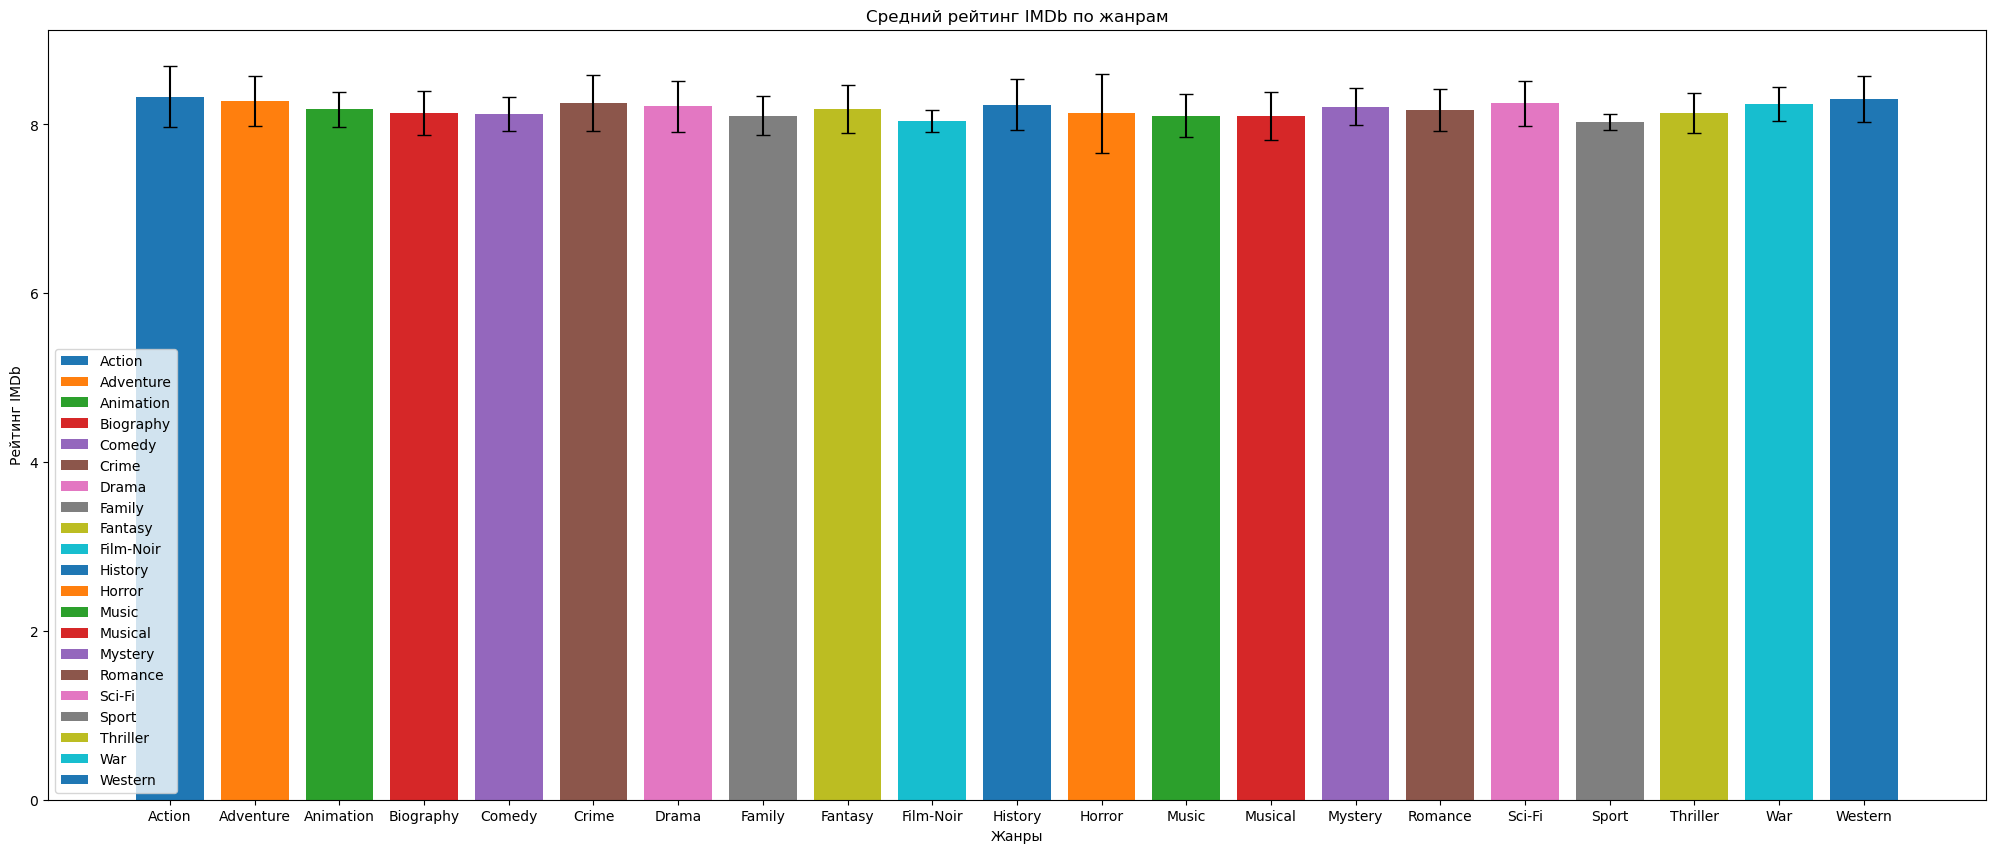

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
for genre in genres:
    genre_ratings = df_movies[df_movies['Genre'].str.contains(genre)]['Rating']
    plt.bar(genre, genre_ratings.mean(), yerr=genre_ratings.std(), capsize=5, label=genre)

plt.xlabel('Жанры')
plt.ylabel('Рейтинг IMDb')
plt.title('Средний рейтинг IMDb по жанрам')
plt.legend()
plt.show()

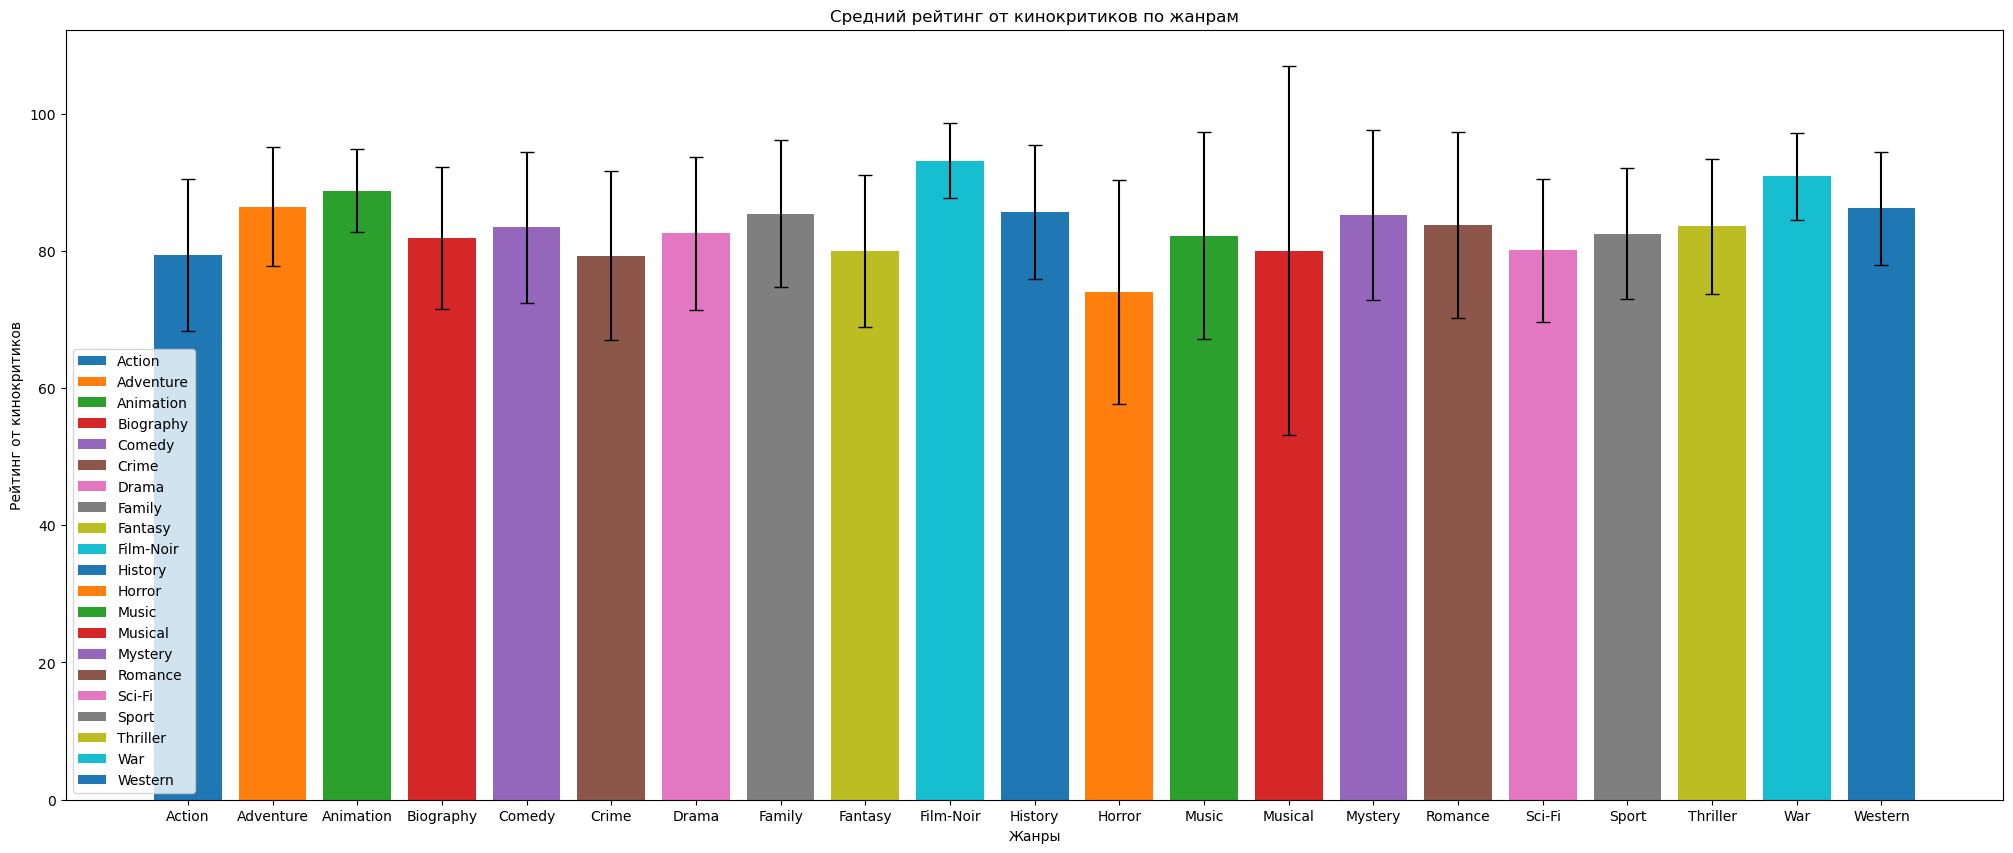

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
for genre in genres:
    genre_ratings = df_movies[df_movies['Genre'].str.contains(genre)]['Metascore']
    plt.bar(genre, genre_ratings.mean(), yerr=genre_ratings.std(), capsize=5, label=genre)

plt.xlabel('Жанры')
plt.ylabel('Рейтинг от кинокритиков')
plt.title('Средний рейтинг от кинокритиков по жанрам')
plt.legend()
plt.show()

**Можно увидеть, что средние оценки от пользователей и критиков очень сильно различаются, так что пользователи могут смотреть только тех жанров, которые им интересны, поэтому их оценка субъективна, а у критиков наоборот цель посмотреть фильм вне зависимости от того, какой жанр они любят.**

**Следующие визуализации мы будем анализировать при дальнейшей работе.**

Text(0.5, 1.0, 'Распределение длительности фильмов')

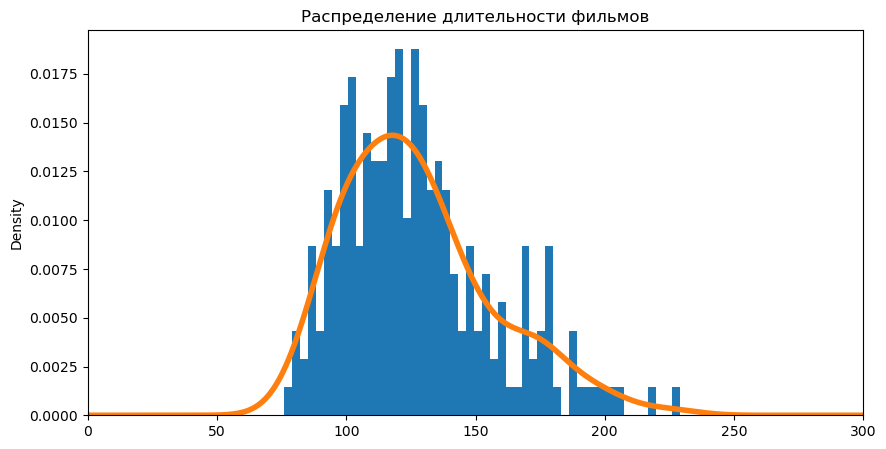

In [80]:

plt.figure(figsize = (10,5))
df_movies.Runtime_min.hist(bins=50, density=True);
df_movies.Runtime_min.plot(kind='kde', linewidth=4)
plt.xlim(0, 300)
plt.title("Распределение длительности фильмов")

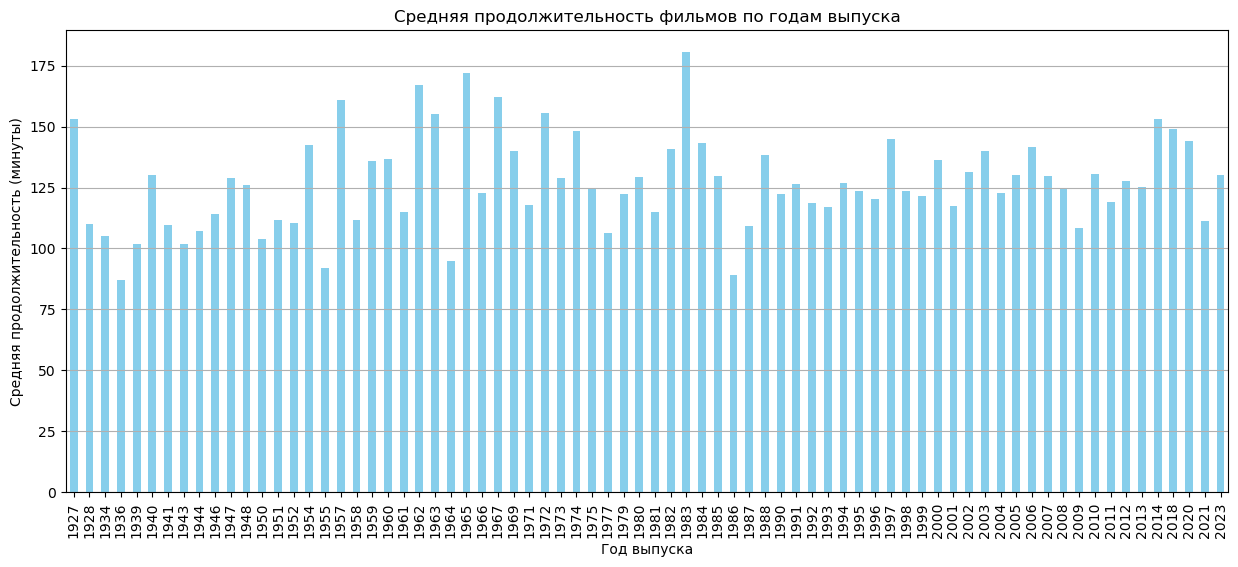

In [81]:

average_run=df_movies.groupby('Year')['Runtime_min'].mean()
plt.figure(figsize=(15, 6))
average_run.plot(kind='bar', color='skyblue')
plt.title('Средняя продолжительность фильмов по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя продолжительность (минуты)')
plt.grid(axis='y')
plt.show()